<a href="https://colab.research.google.com/github/willaevangelista/matplotlib-seaborn_python/blob/main/%5BWoMakersCode%5D_Desafio_em_Grupo_Estat%C3%ADstica_(eu_que_fiz).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio 1: O perfil do Catálogo da Netflix**

Esse desafio tem como objetivo responder algumas perguntas através da
análise de dados, aprofundando o conhecimento em frequência e medidas.
Os dados que deverão ser utilizado nesse script foram baixados do kaggle,
e podem ser acessados através do link:
https://www.kaggle.com/code/shivamb/netflix-shows-and-movies-exploratory-analysis
Este conjunto de dados consiste na lista de filmes e suas respectivas e
suas informações.

**Variáveis:**
*   show_id - id único do filme/série.
*   title - título do filme ou série
*   director - diretor do filme ou série
*   cast - elenco do filme ou série
*   country - país do filme ou série
*   date_added - data que foi adicionado no Netflix
*   reading score - ano de lançamento original do filme
*   rating - classificação da televisão
*   duration - duração total do filme ou série.
*   listed_in - categoria ou gênero do filme ou série.
*   description -descrição do filme ou série.
*   type - tipo de filme ou série

# Importações


In [ ]:
# importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importando base de dados

df = pd.read_csv('/content/netflix_titles_nov_2019.csv')

# Verificando se a DataFrame foi realmente importada corretamente
print(df.head(10).to_string() + "\n")
df.info()

    show_id                                   title                    director                                                                                                                                                                                                                 cast                                 country         date_added  release_year rating   duration                                                          listed_in                                                                                                                                              description     type
0  81193313                               Chocolate                         NaN                                                                                                              Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang Bu-ja, Lee Jae-ryong, Min Jin-woong, Kim Won-hae, Yoo Teo                             South Korea  November 30, 2019          2019  TV-14   1 Season    

# Exercício 1: Exploração inicial

Quantas linhas e colunas tem o dataset?

In [ ]:
num_linhas = df.shape[0] # eixo X = 0 (horizontal) -> linhas
num_colunas = df.shape[1] # eixo Y = 1 (vertical) -> colunas

print(f'O Catálogo da Netflix tem {num_linhas} linhas e {num_colunas} colunas.')

O Catálogo da Netflix tem 5837 linhas e 12 colunas.


Quais são os tipos das variáveis e se há valores ausentes?

In [ ]:
valores_ausentes = df.isnull().sum()
print(f'O Catálogo da Netflix tem os seguintes valores austentes:\n\n{valores_ausentes}')

print('\n\nO Catálogo da Netflix tem os seguintes tipos de variáveis:')
df.info()

O Catálogo da Netflix tem os seguintes valores austentes:

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64


O Catálogo da Netflix tem os seguintes tipos de variáveis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10 

# Exercício 2: Análises de frequência

Qual a proporção de filmes vs. séries no catálogo?

In [ ]:
movies = df.loc[df['type'] == 'Movie'].shape[0]
tv_shows = df.loc[df['type'] == 'TV Show'].shape[0]

print(f'O Catálogo da Netflix tem {movies} filmes e {tv_shows} TV Shows.')

O Catálogo da Netflix tem 3939 filmes e 1898 TV Shows.


Qual o gênero mais frequente?

In [ ]:
# Dado que cada obra tem mais de um gênero listado na mesma coluna, é necessário separar as informações
separacao_generos = df['listed_in'].str.split(', ').explode() # o explode() transforma essas informações aglomeradas em linhas separadas

conta_genero = separacao_generos.value_counts() # verificação do somatório de aparições de determinado gênero no catálogo
#print(conta_genero)

mais_frequente = conta_genero.idxmax()
print(f'\nO gênero mais frequente do Catálogo da Netflix é: {mais_frequente}.')


O gênero mais frequente do Catálogo da Netflix é: International Movies.


# Exercício 3: Análises estatísticas

Qual a média, mediana e moda do tempo de duração dos
filmes?

In [ ]:
# filtrando apenas os filmes, removendo "min" da duração e convertendo para float para permitir cálculos
duracao = df.loc[df['type'] == 'Movie', 'duration'].str.replace('min', '').astype(float)

#print(duracao)
#df['duration'] = df['duration']

tempo_media = duracao.mean()
tempo_mediana = duracao.median()
tempo_moda = duracao.mode()[0]

print(f'Duração dos Filmes do Catálogo da Netflix: \n\nMédia: {tempo_media:.2f}\nMediana: {tempo_mediana:.2f} \nModa: {tempo_moda:.2f}')

#df.loc[df['type'] == 'Movie'].media()
#df.loc[df['type'] == 'Movie'].mode()

Duração dos Filmes do Catálogo da Netflix: 

Média: 98.03
Mediana: 97.00 
Moda: 90.00


Qual o filme mais curto e mais longo?

In [ ]:
duracao_max = duracao.max()
duracao_min = duracao.min()

print(f'O filme mais curto tem {duracao_min:.2f} minutos de duração.')
print(f'O filme mais longo tem {duracao_max:.2f} minutos de duração.')

O filme mais curto tem 3.00 minutos de duração.
O filme mais longo tem 312.00 minutos de duração.


# Exercício 4: Visualização de dados

Criar um gráfico de barras para mostrar a quantidade de títulos
por gênero.

<ipython-input-84-80cf46d70254>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y, y=x, palette="viridis")  # usando o seaborn para criar o gráfico com uma paleta de cores agradável


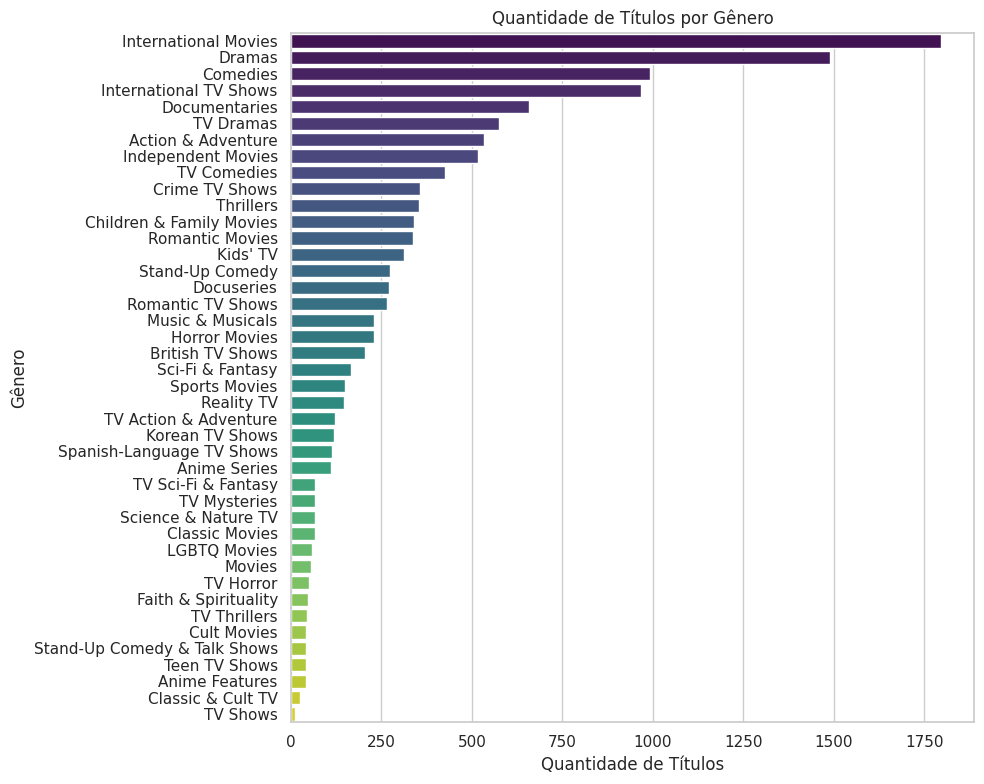

In [84]:
# ordenação dos dados do menor para o maior
conta_genero_ordenado = conta_genero.sort_values(ascending=False)

# definindo x e y
x = conta_genero_ordenado.index  # gêneros dos títulos ordenados
y = conta_genero_ordenado.values  # quantidade de títulos por gênero ordenada

# definindo o estilo do gráfico
sns.set(style="whitegrid")  # estilo de fundo com grid branco

# criando o gráfico de barras horizontal
plt.figure(figsize=(10, 8))  # ajusta o tamanho da figura para mais espaço
sns.barplot(x=y, y=x, palette="viridis")  # usando o seaborn para criar o gráfico com uma paleta de cores agradável

# adicionando título e rótulos
plt.xlabel('Quantidade de Títulos')
plt.ylabel('Gênero')
plt.title('Quantidade de Títulos por Gênero')

plt.tight_layout()  # ajusta automaticamente o layout para evitar sobreposição
plt.show()

Criar um histograma para analisar a distribuição da duração dos
filmes.

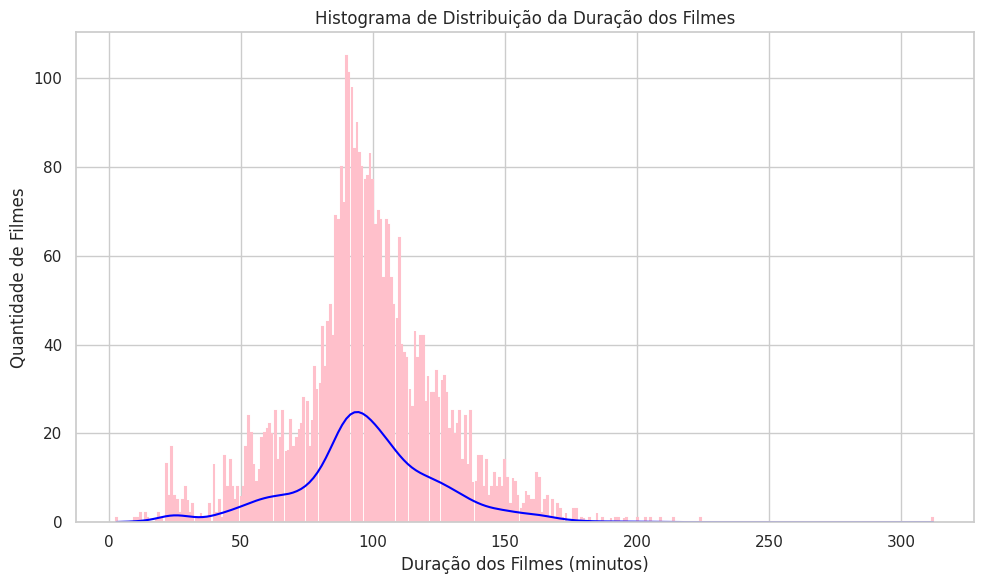

In [76]:
# filtrando apenas os filmes, removendo "min" da duração e convertendo para float
duracao = df.loc[df['type'] == 'Movie', 'duration'].str.replace('min', '').astype(float)

# definindo o estilo do gráfico
sns.set(style="whitegrid")  # Estilo de fundo com grid branco

# criando o histograma com Seaborn
plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura para melhor visualização
sns.histplot(duracao, bins=1000, kde=True, color='blue', edgecolor='pink', linewidth=1.5)  # 'kde=True' adiciona a linha de densidade

# adicionando título e rótulos
plt.xlabel('Duração dos Filmes (minutos)')
plt.ylabel('Quantidade de Filmes')
plt.title('Histograma de Distribuição da Duração dos Filmes')

# exibindo o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

# Exercício 5: Atividade extra

Quais são os 5 países que possuem mais produções no catálogo?

Os 5 países que possuem mais produções no Catálogo da Netflix são:

country
United States     2420
India              753
United Kingdom     558
Canada             300
France             255
Name: count, dtype: int64


<ipython-input-83-50b5008c4da4>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y, y=x, palette="viridis")  # usando o seaborn para criar o gráfico com uma paleta de cores agradável


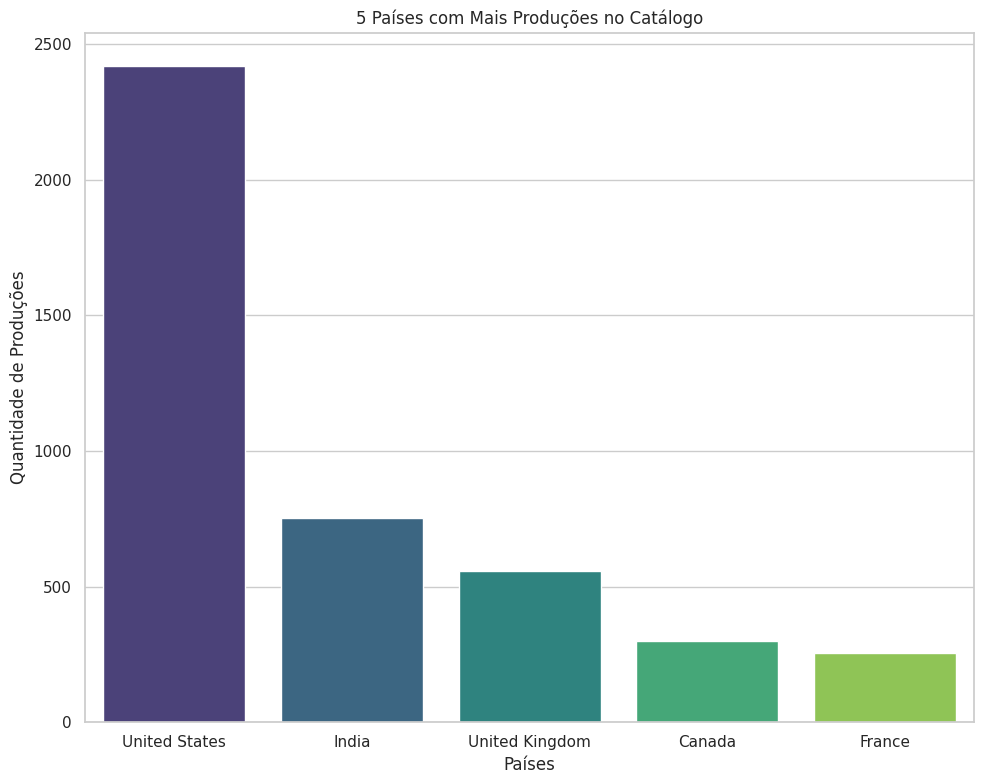

In [83]:
# sado que cada muitas produções possuem mais de um país envolvido nela, é necessário separar essas informações
separacao_paises = df['country'].str.split(', ').explode() # o explode() transforma essas informações aglomeradas em linhas separadas

conta_paises = separacao_paises.value_counts() # verificação do somatório de aparições de determinado país no catálogo
print(f'Os 5 países que possuem mais produções no Catálogo da Netflix são:\n\n{conta_paises.head(5)}')

# Criação de Gráfico de Barras

# definindo x e y
x = conta_paises.head(5).values  # nome dos países
y = conta_paises.head(5).index  # quantidade de produções

# definindo o estilo do gráfico
sns.set(style="whitegrid")  # estilo de fundo com grid branco

# criando o gráfico de barras horizontal
plt.figure(figsize=(10, 8))  # ajusta o tamanho da figura para mais espaço
sns.barplot(x=y, y=x, palette="viridis")  # usando o seaborn para criar o gráfico com uma paleta de cores agradável

# adicionando título e rótulos
plt.xlabel('Países')
plt.ylabel('Quantidade de Produções')
plt.title('5 Países com Mais Produções no Catálogo')

plt.tight_layout()  # ajusta automaticamente o layout para evitar sobreposição
plt.show()